In [1]:
%matplotlib notebook
import numpy as np
import pandas
import matplotlib.pyplot as plt

from sedkcorr.sed_fitting import lephare

In [2]:
data_mag = {"mag_FUV":24.34941529151189, "mag_FUV.err":0.2808529712437018, "mag_NUV":23.131763356831183,
        "mag_NUV.err":0.09311475654141255, "mag_u":20.91321870241184, "mag_u.err":0.17575489046042136,
        "mag_g":19.027929430034394, "mag_g.err":0.011213086618905521, "mag_r":18.131317367139847,
        "mag_r.err":0.008302712573136972, "mag_i":17.708476613246482, "mag_i.err":0.008509995022562222,
        "mag_z":17.381505953770187, "mag_z.err":0.027499037334056453, "CONTEXT":127, "Z-SPEC":0.05821464776210461,
        "STRING":"SN2006ob"}

data_flux = {"flux_FUV":8.418119645517397e-18, "flux_FUV.err":2.143661908713681e-18, 
             "flux_NUV":1.1382562931688215e-17, "flux_NUV.err":9.604776017815744e-19, 
             "flux_u":3.6405973425498647e-17, "flux_u.err":5.8105758510391525e-18, 
             "flux_g":1.199744512838845e-16, "flux_g.err":1.2645403391975792e-18, 
             "flux_r":1.5925481408070496e-16, "flux_r.err":1.2303613829159515e-18, 
             "flux_i":1.5973227540346776e-16, "flux_i.err":1.2616792254120978e-18, 
             "flux_z":1.5282070538096207e-16, "flux_z.err":3.938851888085081e-18,
             "CONTEXT":127, "Z-SPEC":0.05821464776210461, "STRING":"SN2006ob"}


In [3]:
try:
    data_mag = pandas.DataFrame(data_mag)
except(ValueError):
    for k, v in data_mag.items():
        data_mag[k] = [v]
    data_mag = pandas.DataFrame(data_mag)

data_mag

,mag_FUV,mag_FUV.err,mag_NUV,mag_NUV.err,mag_u,mag_u.err,mag_g,mag_g.err,mag_r,mag_r.err,mag_i,mag_i.err,mag_z,mag_z.err,CONTEXT,Z-SPEC,STRING
0,24.349415,0.280853,23.131763,0.093115,20.913219,0.175755,19.027929,0.011213,18.131317,0.008303,17.708477,0.00851,17.381506,0.027499,127,0.058215,SN2006ob


In [4]:
try:
    data_flux = pandas.DataFrame(data_flux)
except(ValueError):
    for k, v in data_flux.items():
        data_flux[k] = [v]
    data_flux = pandas.DataFrame(data_flux)

data_flux

,flux_FUV,flux_FUV.err,flux_NUV,flux_NUV.err,flux_u,flux_u.err,flux_g,flux_g.err,flux_r,flux_r.err,flux_i,flux_i.err,flux_z,flux_z.err,CONTEXT,Z-SPEC,STRING
0,8.418120e-18,2.143662e-18,1.138256e-17,9.604776e-19,3.640597e-17,5.810576e-18,1.199745e-16,1.264540e-18,1.592548e-16,1.230361e-18,1.597323e-16,1.261679e-18,1.528207e-16,3.938852e-18,127,0.058215,SN2006ob


In [5]:
test_fit = lephare.LePhareSEDFitter()

In [6]:
test_fit.set_data(data=data_flux, 
                  results_path="/Users/mart1/Desktop/Libraries/sedkcorr/test/lephare/data.out", 
                  flux_unit="AA")

In [7]:
test_fit.describe_params("input")

STAR_SED : $LEPHAREDIR/sed/STAR/STAR_MOD.list (comented? : False)
STAR_FSCALE : 3.432E-09 (comented? : False)
STAR_LIB : LIB_STAR (comented? : False)
QSO_SED : $LEPHAREDIR/sed/QSO/QSO_MOD.list (comented? : False)
QSO_FSCALE : 1 (comented? : False)
QSO_LIB : LIB_QSO (comented? : False)
GAL_SED : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_MOD.list (comented? : False)
GAL_FSCALE : 1. (comented? : False)
GAL_LIB : LIB_BC03 (comented? : False)
SEL_AGE : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_AGE.list (comented? : False)
AGE_RANGE : 0.,13.55e9 (comented? : False)
FILTER_LIST : galex/FUV.pb,galex/NUV.pb,sdss/up.pb,sdss/gp.pb,sdss/rp.pb,sdss/ip.pb,sdss/zp.pb (comented? : False)
TRANS_TYPE : 0 (comented? : False)
FILTER_CALIB : 0 (comented? : False)
FILTER_FILE : galex_sdss.filt (comented? : False)
STAR_LIB_IN : LIB_STAR (comented? : False)
STAR_LIB_OUT : STAR (comented? : False)
QSO_LIB_IN : LIB_QSO (comented? : False)
QSO_LIB_OUT : QSO (comented? : False)
GAL_LIB_IN : LIB_BC03 (comented? : False)
GAL_LIB

In [8]:
test_fit.run_filter()

In [9]:
test_fit.run_sedtolib()

In [10]:
test_fit.run_mag_star()

In [11]:
test_fit.run_mag_gal()

In [12]:
test_fit.run_zphota()

<IPython.core.display.Javascript object>


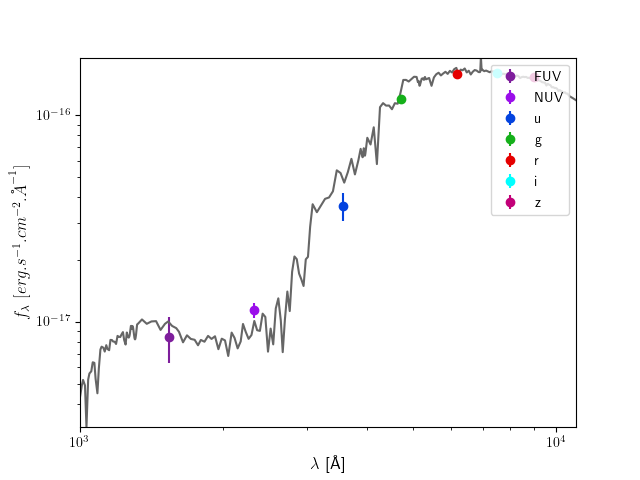

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x11f2b9d30>,
 'fig': <Figure size 640x480 with 1 Axes>}

In [13]:
test_fit.show(id_sed=0, y_unit="AA", plot_phot=True, xlim=(1000, 11000), ylim=(None, None), 
              savefile=None, xscale="log", yscale="log")

In [14]:
test2 = lephare.LePhareRand()

In [15]:
test2.set_data(data=data_flux, 
               results_path="/Users/mart1/Desktop/Libraries/sedkcorr/test/lephare/data_rand.out", 
               flux_unit="AA")

In [16]:
test2.data_rand

,flux_FUV,flux_FUV.err,flux_NUV,flux_NUV.err,flux_u,flux_u.err,flux_g,flux_g.err,flux_r,flux_r.err,flux_i,flux_i.err,flux_z,flux_z.err,CONTEXT,Z-SPEC,STRING_0
0,6.430236e-30,1.693608e-30,1.953133e-29,1.718477e-30,1.417049e-28,2.459157e-29,8.909887e-28,9.393165e-30,2.022204e-27,1.569970e-29,2.984369e-27,2.367286e-29,4.122627e-27,1.055023e-28,127,0.058215,SN2006ob
1,5.936303e-30,1.693608e-30,2.126203e-29,1.718477e-30,1.613169e-28,2.459157e-29,8.904649e-28,9.393165e-30,2.059457e-27,1.569970e-29,2.982294e-27,2.367286e-29,4.305774e-27,1.055023e-28,127,0.058215,SN2006ob
2,6.469796e-30,1.693608e-30,2.081767e-29,1.718477e-30,1.303534e-28,2.459157e-29,8.920529e-28,9.393165e-30,2.003297e-27,1.569970e-29,2.990799e-27,2.367286e-29,4.220528e-27,1.055023e-28,127,0.058215,SN2006ob
3,4.505708e-30,1.693608e-30,2.101735e-29,1.718477e-30,1.634696e-28,2.459157e-29,8.891317e-28,9.393165e-30,2.053116e-27,1.569970e-29,3.016908e-27,2.367286e-29,4.120576e-27,1.055023e-28,127,0.058215,SN2006ob
4,6.279107e-30,1.693608e-30,1.974716e-29,1.718477e-30,1.456950e-28,2.459157e-29,8.903152e-28,9.393165e-30,2.034418e-27,1.569970e-29,3.011140e-27,2.367286e-29,4.016348e-27,1.055023e-28,127,0.058215,SN2006ob
5,6.873725e-30,1.693608e-30,2.177501e-29,1.718477e-30,1.532300e-28,2.459157e-29,8.916657e-28,9.393165e-30,2.046629e-27,1.569970e-29,2.986062e-27,2.367286e-29,4.266097e-27,1.055023e-28,127,0.058215,SN2006ob
6,6.794635e-30,1.693608e-30,2.363185e-29,1.718477e-30,1.815108e-28,2.459157e-29,8.903354e-28,9.393165e-30,2.016796e-27,1.569970e-29,2.963824e-27,2.367286e-29,4.035338e-27,1.055023e-28,127,0.058215,SN2006ob
7,3.760143e-30,1.693608e-30,1.975595e-29,1.718477e-30,1.505603e-28,2.459157e-29,8.895576e-28,9.393165e-30,2.053114e-27,1.569970e-29,2.971306e-27,2.367286e-29,3.979689e-27,1.055023e-28,127,0.058215,SN2006ob
8,5.068686e-30,1.693608e-30,1.888063e-29,1.718477e-30,1.782010e-28,2.459157e-29,8.990028e-28,9.393165e-30,2.027998e-27,1.569970e-29,3.002779e-27,2.367286e-29,4.109393e-27,1.055023e-28,127,0.058215,SN2006ob
9,7.494632e-30,1.693608e-30,1.843450e-29,1.718477e-30,1.478886e-28,2.459157e-29,9.157245e-28,9.393165e-30,2.019688e-27,1.569970e-29,3.009727e-27,2.367286e-29,3.969522e-27,1.055023e-28,127,0.058215,SN2006ob


In [17]:
test_fit.describe_params("input")

STAR_SED : $LEPHAREDIR/sed/STAR/STAR_MOD.list (comented? : False)
STAR_FSCALE : 3.432E-09 (comented? : False)
STAR_LIB : LIB_STAR (comented? : False)
QSO_SED : $LEPHAREDIR/sed/QSO/QSO_MOD.list (comented? : False)
QSO_FSCALE : 1 (comented? : False)
QSO_LIB : LIB_QSO (comented? : False)
GAL_SED : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_MOD.list (comented? : False)
GAL_FSCALE : 1. (comented? : False)
GAL_LIB : LIB_BC03 (comented? : False)
SEL_AGE : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_AGE.list (comented? : False)
AGE_RANGE : 0.,13.55e9 (comented? : False)
FILTER_LIST : galex/FUV.pb,galex/NUV.pb,sdss/up.pb,sdss/gp.pb,sdss/rp.pb,sdss/ip.pb,sdss/zp.pb (comented? : False)
TRANS_TYPE : 0 (comented? : False)
FILTER_CALIB : 0 (comented? : False)
FILTER_FILE : galex_sdss.filt (comented? : False)
STAR_LIB_IN : LIB_STAR (comented? : False)
STAR_LIB_OUT : STAR (comented? : False)
QSO_LIB_IN : LIB_QSO (comented? : False)
QSO_LIB_OUT : QSO (comented? : False)
GAL_LIB_IN : LIB_BC03 (comented? : False)
GAL_LIB

In [18]:
test2.run_filter()

In [19]:
test2.run_sedtolib()

In [20]:
test2.run_mag_star()

In [21]:
test2.run_mag_gal()

In [22]:
test2.run_zphota()

<IPython.core.display.Javascript object>


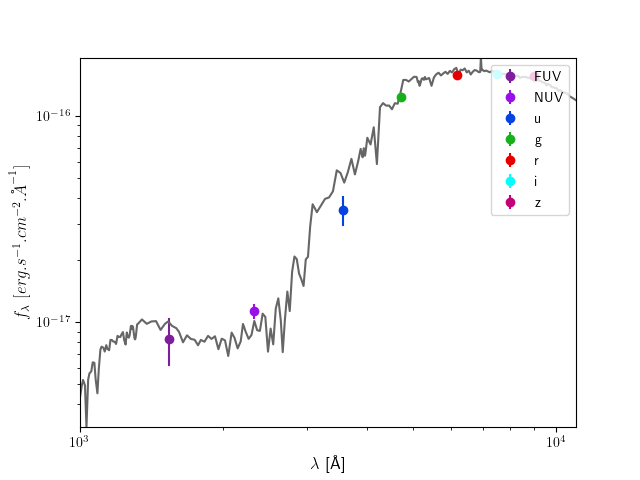

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x182251cf98>,
 'fig': <Figure size 640x480 with 1 Axes>}

In [26]:
test2.show(id_sed=24, y_unit="AA", plot_phot=True, xlim=(1000, 11000), ylim=(None, None), 
           savefile=None, xscale="log", yscale="log")